In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [14]:
df = pd.read_csv(r'C:\Users\IFC-27\Downloads\cars.csv')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [16]:
print(df.columns)


Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')


In [17]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


In [18]:
print(df[['year', 'mpg']].isnull().sum())  # To check for NaN values in these columns


year    0
mpg     0
dtype: int64


Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')
year    0
mpg     0
dtype: int64


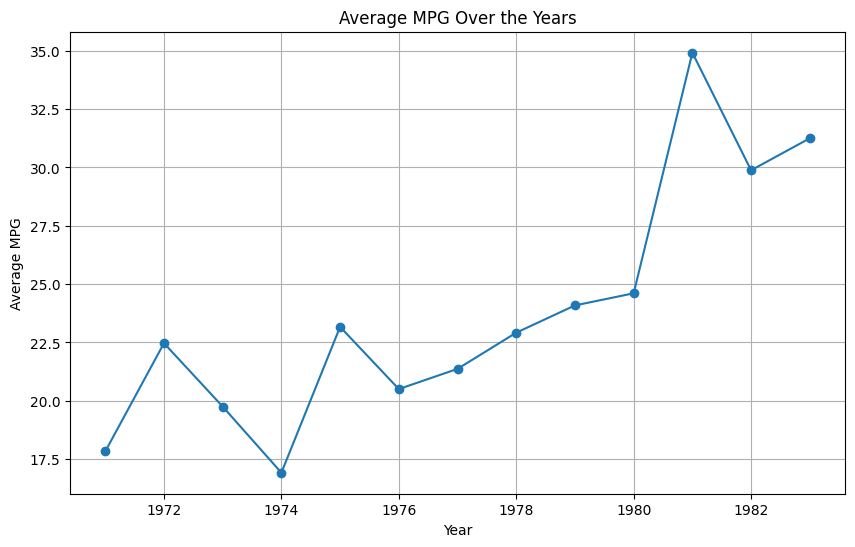

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Check column names
print(df.columns)

# Strip spaces from column names if necessary
df.columns = df.columns.str.strip()

# Check for NaN values in 'year' and 'mpg' columns
print(df[['year', 'mpg']].isnull().sum())

# Drop rows with missing 'year' or 'mpg' values (if needed)
df = df.dropna(subset=['year', 'mpg'])

# Now, try calculating the average MPG by year
mpg_by_year = df.groupby('year')['mpg'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(mpg_by_year.index, mpg_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('Average MPG Over the Years')
plt.grid(True)
plt.show()


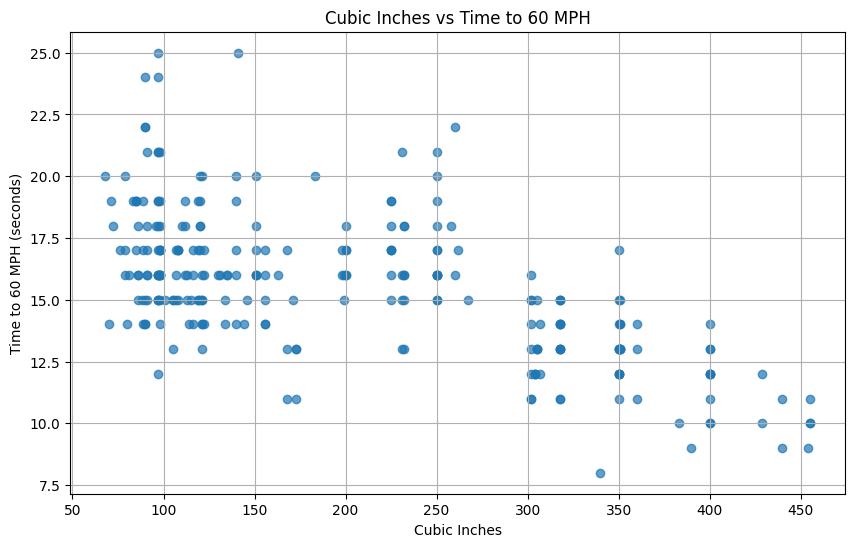

In [20]:
# Convert 'cubicinches' and 'weightlbs' columns to numeric, forcing errors to NaN
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')

# Drop rows with NaN values in 'cubicinches' or 'time-to-60'
df_clean = df.dropna(subset=['cubicinches', 'time-to-60'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['cubicinches'], df_clean['time-to-60'], alpha=0.7)
plt.xlabel('Cubic Inches')
plt.ylabel('Time to 60 MPH (seconds)')
plt.title('Cubic Inches vs Time to 60 MPH')
plt.grid(True)
plt.show()

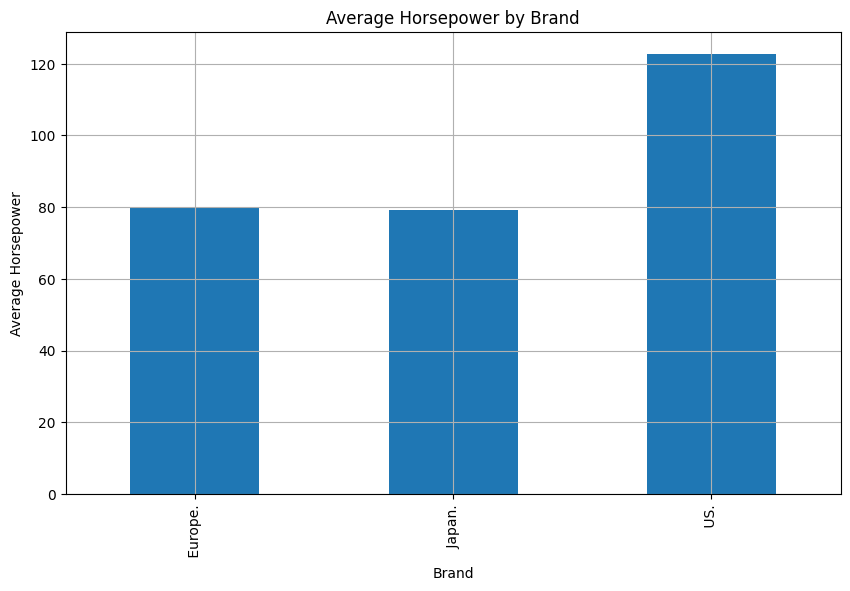

brand
Europe.     79.958333
Japan.      79.313725
US.        122.697531
Name: hp, dtype: float64


In [21]:
# Group by 'brand' and calculate the average horsepower
hp_by_brand = df.groupby('brand')['hp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
hp_by_brand.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Horsepower')
plt.title('Average Horsepower by Brand')
plt.grid(True)
plt.show()

# Print the average horsepower by brand
print(hp_by_brand)

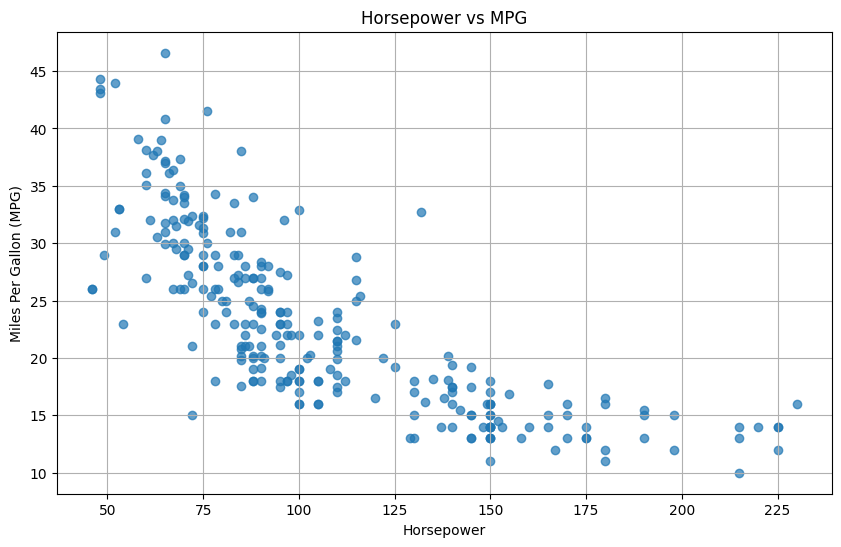

Correlation between horsepower and MPG: -0.7749050346556694


In [23]:
# Create a scatter plot to visualize the relationship between horsepower and MPG
plt.figure(figsize=(10, 6))
plt.scatter(df['hp'], df['mpg'], alpha=0.7)
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.title('Horsepower vs MPG')
plt.grid(True)
plt.show()

# Calculate the correlation between horsepower and MPG
correlation_hp_mpg = df['hp'].corr(df['mpg'])
print(f'Correlation between horsepower and MPG: {correlation_hp_mpg}')

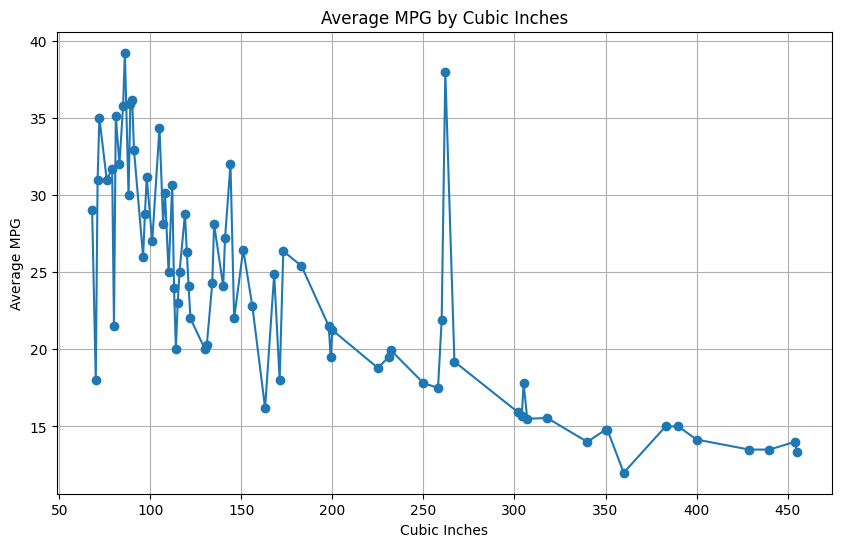

cubicinches
68.0     29.000000
70.0     18.000000
71.0     31.000000
72.0     35.000000
76.0     31.000000
           ...    
400.0    14.150000
429.0    13.500000
440.0    13.500000
454.0    14.000000
455.0    13.333333
Name: mpg, Length: 74, dtype: float64


In [27]:
mpg_by_cubicinches = df.groupby('cubicinches')['mpg'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mpg_by_cubicinches.index, mpg_by_cubicinches.values, marker='o')
plt.xlabel('Cubic Inches')
plt.ylabel('Average MPG')
plt.title('Average MPG by Cubic Inches')
plt.grid(True)
plt.show()
print(mpg_by_cubicinches)

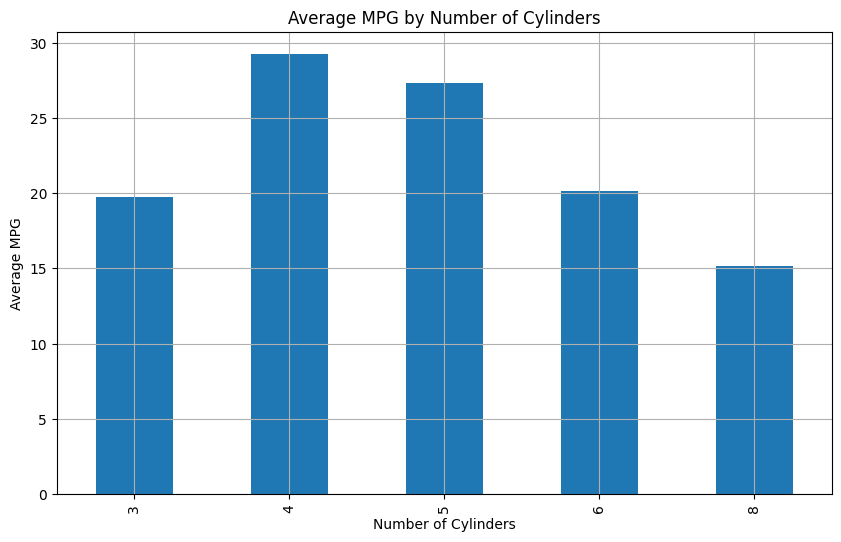

cylinders
3    19.750000
4    29.273600
5    27.366667
6    20.145455
8    15.157895
Name: mpg, dtype: float64


In [25]:
# Group by 'cylinders' and calculate the average MPG
mpg_by_cylinders = df.groupby('cylinders')['mpg'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mpg_by_cylinders.plot(kind='bar')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.title('Average MPG by Number of Cylinders')
plt.grid(True)
plt.show()

# Print the average MPG by number of cylinders
print(mpg_by_cylinders)

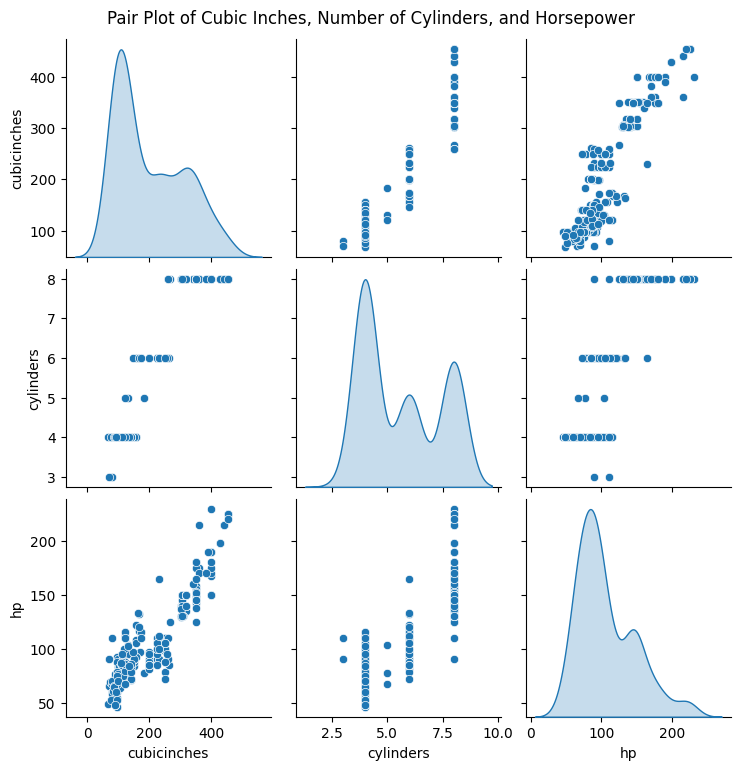

In [28]:
# Create a pair plot to visualize the relationships between cubic inches, number of cylinders, and horsepower
sns.pairplot(df, vars=['cubicinches', 'cylinders', 'hp'], kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot of Cubic Inches, Number of Cylinders, and Horsepower', y=1.02)
plt.show()

In [29]:
# Calculate the number of vehicles with 8 cylinders
num_8_cylinders = df[df['cylinders'] == 8].shape[0]

# Calculate the total number of records
total_records = df.shape[0]

# Calculate the proportion
proportion_8_cylinders = num_8_cylinders / total_records

print(f'Proportion of vehicles with 8 cylinders: {proportion_8_cylinders:.2%}')

Proportion of vehicles with 8 cylinders: 29.12%
